In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [172]:
mnist_data = fetch_openml('mnist_784', version=1)

In [181]:
X_data = mnist_data['data'].values  
y_data = mnist_data['target'].values
y_data = y_data.astype(int)
X_data = X_data / 255.0
sample_size = 7000
random_indices = np.random.choice(X_data.shape[0], sample_size, replace=False)
X_data = X_data[random_indices]
print(X_data[0])
y_data = y_data[random_indices]
k_values = [i for i in range(1,11)]


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [174]:

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5600, 784) (1400, 784) (5600,) (1400,)


In [175]:

accuracies = []
for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)  
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'n={i}, Accuracy={accuracy:.4f}')

n=1, Accuracy=0.9400
n=2, Accuracy=0.9257
n=3, Accuracy=0.9314
n=4, Accuracy=0.9243
n=5, Accuracy=0.9321
n=6, Accuracy=0.9250
n=7, Accuracy=0.9236
n=8, Accuracy=0.9207
n=9, Accuracy=0.9229
n=10, Accuracy=0.9221


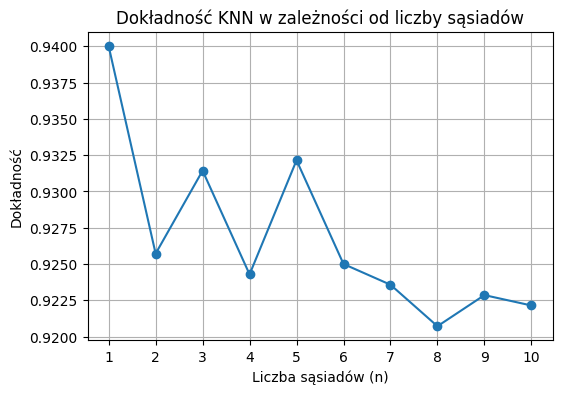

In [176]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o')
plt.title('Dokładność KNN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (n)')
plt.ylabel('Dokładność')
plt.xticks(k_values)
plt.grid()
plt.show()

In [177]:

bootstrap_iterations = [1, 2, 11, 22, 44, 88] 
results = {k: [] for k in k_values}
for k in k_values:
    for iters in bootstrap_iterations:
        accuracies = []
        for _ in range(iters):
            
            X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=None)
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

        mean_accuracy = np.mean(accuracies)
        results[k].append(mean_accuracy)

for k, mean_accuracies in results.items():
    print(f'Wyniki dla k={k}: {mean_accuracies}')

Wyniki dla k=1: [np.float64(0.935), np.float64(0.9342857142857143), np.float64(0.9416883116883118), np.float64(0.9385064935064933), np.float64(0.9384253246753247), np.float64(0.9393912337662337)]
Wyniki dla k=2: [np.float64(0.9271428571428572), np.float64(0.9285714285714286), np.float64(0.9236363636363637), np.float64(0.9237337662337665), np.float64(0.9271103896103896), np.float64(0.9266964285714284)]
Wyniki dla k=3: [np.float64(0.9442857142857143), np.float64(0.9364285714285714), np.float64(0.9346753246753248), np.float64(0.9375974025974027), np.float64(0.9377597402597403), np.float64(0.9356818181818182)]
Wyniki dla k=4: [np.float64(0.9414285714285714), np.float64(0.94), np.float64(0.9329220779220777), np.float64(0.9337662337662335), np.float64(0.9339610389610389), np.float64(0.9337256493506494)]
Wyniki dla k=5: [np.float64(0.935), np.float64(0.9364285714285714), np.float64(0.9357792207792208), np.float64(0.9342532467532467), np.float64(0.9356331168831169), np.float64(0.93486201298701

Text(0.5, 1.0, 'Dokładność KNN w zależności od liczby iteracji bootstrap')

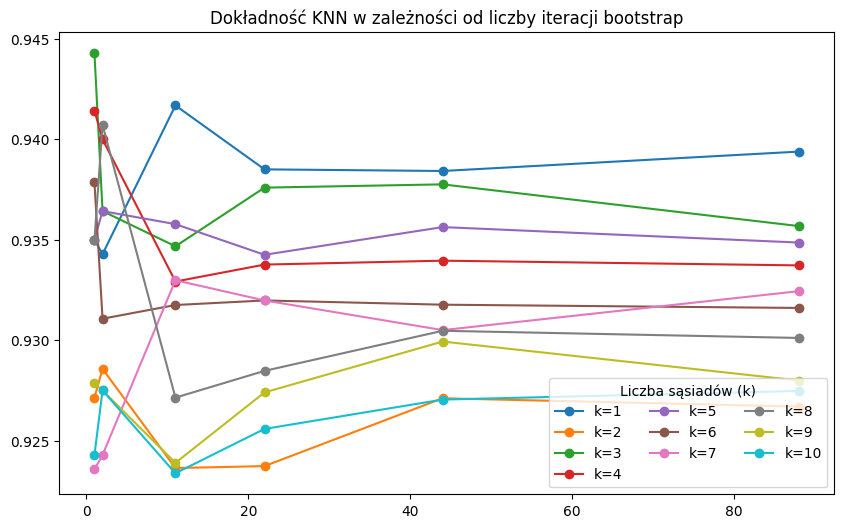

In [178]:
plt.figure(figsize=(10, 6))
for i in k_values:
    plt.plot(bootstrap_iterations, results[i], marker='o', label=f'k={i}')
plt.legend(loc='lower right', ncol=3, title='Liczba sąsiadów (k)')
plt.title('Dokładność KNN w zależności od liczby iteracji bootstrap')

{1: np.float64(0.9378828463203462), 2: np.float64(0.9261485389610392), 3: np.float64(0.9377380952380953), 4: np.float64(0.9359672619047618), 5: np.float64(0.9353260281385282), 6: np.float64(0.93267316017316), 7: np.float64(0.9292951839826841), 8: np.float64(0.9319859307359307), 9: np.float64(0.9274310064935065), 10: np.float64(0.9258779761904762)}


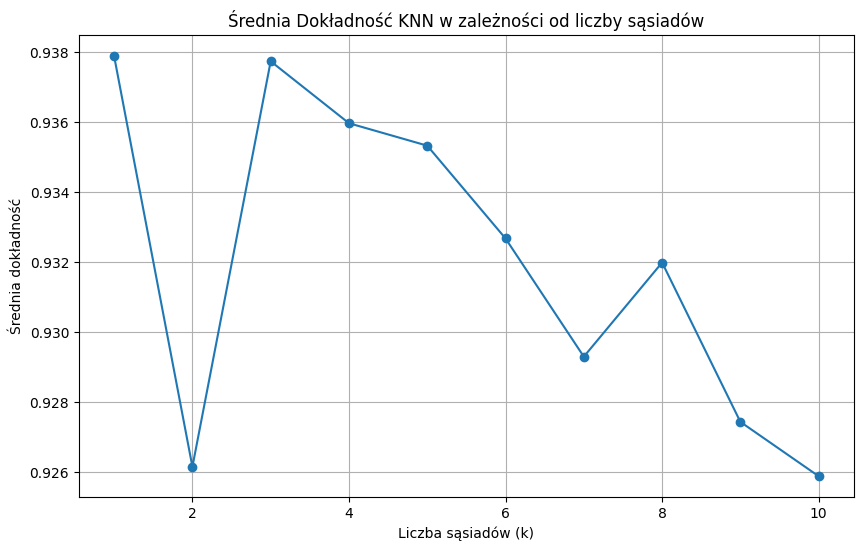

In [179]:
plt.figure(figsize=(10, 6))
results2 = {k: np.mean(results[k]) for k in results.keys()}
print(results2)
plt.plot(results2.keys(),results2.values(), marker='o')
plt.title('Średnia Dokładność KNN w zależności od liczby sąsiadów')
plt.xlabel('Liczba sąsiadów (k)')
plt.ylabel('Średnia dokładność')
plt.grid()